### **FlexML:** Classification Experiment with Breast Canser Prediction Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

from flexml import Classification
from sklearn.datasets import load_breast_cancer

In [2]:
df = load_breast_cancer(as_frame = True)['frame']

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
"""
* experiment_size: default is quick, quick (uses almost half amount of the available ml models), wide (Uses all available ml models)
* test_size: default is 0.25
* eval_metric: default is "accuracy", other options are "precision", "recall", "f1_score"
* random_state: default is 42
"""
classification_exp = Classification(data=df, target_col="target")
classification_exp.start_experiment(experiment_size="quick", test_size=0.25, eval_metric="accuracy", random_state=42)

INFO | 2024-09-01 20:08:55 | [PROCESS] Training the ML models
100%|██████████| 6/6 [00:01<00:00,  3.11it/s]
INFO | 2024-09-01 20:08:57 | [PROCESS] Model training is finished!


,model_name,accuracy,precision,recall,f1_score
0,CatBoostClassifier,0.972000,0.972200,0.972000,0.971900
1,RandomForestClassifier,0.972000,0.972200,0.972000,0.971900
2,LogisticRegression,0.965000,0.965000,0.965000,0.965000
3,XGBClassifier,0.958000,0.958000,0.958000,0.958000
4,LGBMClassifier,0.951000,0.951300,0.951000,0.951100
5,DecisionTreeClassifier,0.937100,0.938500,0.937100,0.937400


In [6]:
# You can also display the model stats after the experiment is done with a desired evaluation metric, default is "accuracy"
classification_exp.show_model_stats(eval_metric="precision")

,model_name,accuracy,precision,recall,f1_score
0,CatBoostClassifier,0.972000,0.972200,0.972000,0.971900
1,RandomForestClassifier,0.972000,0.972200,0.972000,0.971900
2,LogisticRegression,0.965000,0.965000,0.965000,0.965000
3,XGBClassifier,0.958000,0.958000,0.958000,0.958000
4,LGBMClassifier,0.951000,0.951300,0.951000,0.951100
5,DecisionTreeClassifier,0.937100,0.938500,0.937100,0.937400


In [8]:
"""
* You can get the best model(s) by calling get_best_models() method
    - top_n_models: default is 1, If you want to get only one model, you will get a model object, else
    - you will get a list of model objects
* By default, get_best_models() function returns the best model(s) based on the evaluation metric used in the start_experiment()
* But you can reorder the models by passing eval_metric parameter to get_best_models()
"""
best_model = classification_exp.get_best_models(top_n_models=1)

# Optionally, you can get the any model object by "model_name" value in the show_model_stats() output
example_model = classification_exp.get_model_by_name("RandomForestClassifier")

In [9]:
print(best_model)

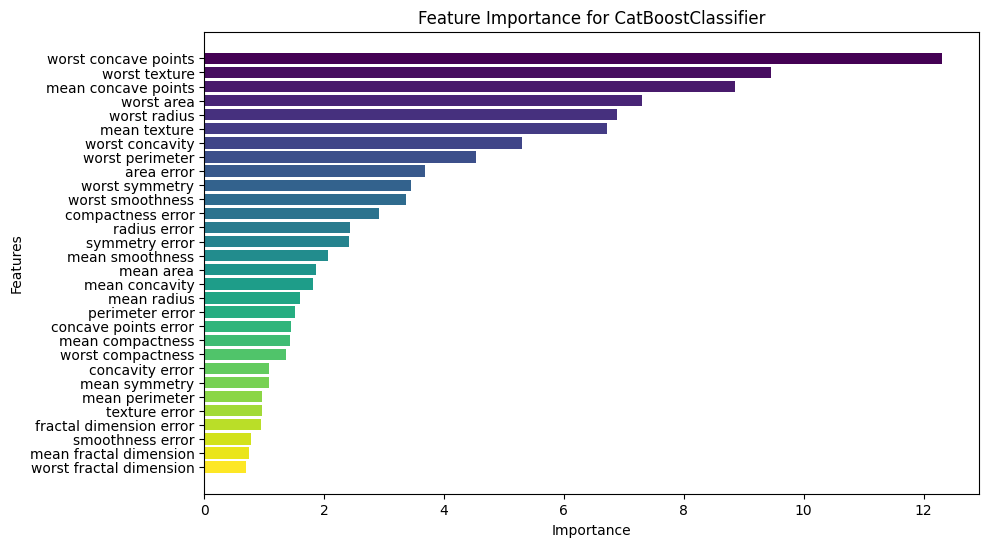

In [10]:
# Plot the feature importance of a model by passing the model object
# Default is the best model found in the experiment
classification_exp.plot_feature_importance()

In [11]:
"""
* model: model object that you want to tune
* tuning_method: default is randomized_search, also grid_search, randomized_search or optuna can be used
* n_trials: default is 10
* cv: default is 3 and It can be minimum 2
"""

classification_exp.tune_model(model=best_model, tuning_method="randomized_search", tuning_size="quick", n_iter=4, cv=3)

INFO | 2024-09-01 20:09:37 | [PROCESS] Model Tuning process is started


Fitting 3 folds for each of 4 candidates, totalling 12 fits


,model_name,accuracy,precision,recall,f1_score
0,CatBoostClassifier_(randomized_search(quick))_(cv=3)_(n_iter=4),0.986000,0.986000,0.986000,0.986000
1,CatBoostClassifier,0.972000,0.972200,0.972000,0.971900
2,RandomForestClassifier,0.972000,0.972200,0.972000,0.971900
3,LogisticRegression,0.965000,0.965000,0.965000,0.965000
4,XGBClassifier,0.958000,0.958000,0.958000,0.958000
5,LGBMClassifier,0.951000,0.951300,0.951000,0.951100
6,DecisionTreeClassifier,0.937100,0.938500,0.937100,0.937400


INFO | 2024-09-01 20:09:49 | [PROCESS] Model Tuning process is finished


In [12]:
# Access to the tuned model

## Option 1: Get the last tuned model object
tuned_model_option_1 = classification_exp.tuned_model

## Option 2: Get it by model name
tuned_model_option_2 = classification_exp.get_model_by_name("CatBoostClassifier_(randomized_search(quick))_(cv=3)_(n_iter=4)")

In [13]:
tuned_model_option_2